<a href="https://colab.research.google.com/github/17Kashish/Automated-Water-Quality-Prediction-and-Monitoring-using-AI-ML/blob/main/WaterQualityPrediction_usingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check GPU availability
!nvidia-smi

# Install Required Libraries
!pip install tensorflow opencv-python keras --upgrade

# Import Libraries
import os
import numpy as np
import pandas as pd
import cv2
from keras.models import load_model
from google.colab import files
import zipfile

Mon Oct 28 03:38:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Upload your zip file here
uploaded = files.upload()

# Extract the dataset
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset_folder')

Saving archive.zip to archive (1).zip


In [ ]:
# Load the trained model
model = load_model('water_quality_model.h5')

In [ ]:
# Load the trained model
model = load_model('water_quality_model.h5')

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Proceed with predictions or evaluations


In [ ]:
# Define image directory
image_directory = '/content/dataset_folder/all_images'

# Load images for prediction
def load_and_preprocess_images(directory, target_size=(64, 64)):
    images = []
    image_names = []

    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, target_size)  # Resize to target size
            img = img / 255.0  # Normalize to [0, 1]
            images.append(img)
            image_names.append(filename)

    return np.array(images), image_names

processed_images, image_names = load_and_preprocess_images(image_directory)

In [ ]:
# Make predictions
predictions = model.predict(processed_images)

# Example: Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)  # Adjust this based on your labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
# Calculate turbidity and other factors
def calculate_turbidity_and_factors(image_directory):
    turbidity_values = []
    factors = []

    for img_name in os.listdir(image_directory):
        img_path = os.path.join(image_directory, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            # Dummy calculation for turbidity (replace with your actual logic)
            turbidity = np.random.uniform(0, 100)  # Simulated turbidity value
            turbidity_values.append(turbidity)
            factors.append({'turbidity': turbidity})  # Add other factors as needed

    return turbidity_values, factors

turbidity_values, factors = calculate_turbidity_and_factors(image_directory)

In [ ]:
# Create DataFrame for results
results = pd.DataFrame({
    'Image_Name': image_names,
    'Predicted_Class': ['Dirty' if pred == 1 else 'Clean' for pred in predicted_classes],
    'Turbidity': turbidity_values,
})

# Save results to a CSV file
results.to_csv('water_quality_results.csv', index=False)
print("Results saved to water_quality_results.csv")


Results saved to water_quality_results.csv


In [ ]:
import pandas as pd

# Load the predictions
results = pd.read_csv('water_quality_results.csv')

# Display the predictions
print(results.head())  # This will show the first few rows of the DataFrame

  Image_Name Predicted_Class  Turbidity
0     10.jpg           Clean  72.237765
1     13.jpg           Clean  60.476893
2     35.jpg           Clean  72.774173
3      4.jpg           Clean  34.531975
4      5.jpg           Clean  88.551062


In [ ]:
import os
import pandas as pd

# Directory containing images
image_directory = 'all_images'

# Ensure the image directory exists
if not os.path.exists(image_directory):
    print("Image directory does not exist.")
else:
    # List all images in the directory
    all_images = os.listdir(image_directory)
    print(f"Total images in 'all_images': {len(all_images)}")

    # Load and process each image to predict
    predictions = []
    for img_name in all_images:
        img_path = os.path.join(image_directory, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (64, 64)) / 255.0  # Normalize and resize
            predictions.append((img_name, model.predict(np.expand_dims(img, axis=0))[0]))

    # Prepare results for DataFrame
    results = pd.DataFrame(predictions, columns=['Image_Name', 'Predicted_Class'])
    results['Predicted_Class'] = results['Predicted_Class'].apply(lambda x: 'Clean' if x < 0.5 else 'Dirty')

    # Save results to CSV
    results.to_csv('water_quality_results.csv', index=False)

Image directory does not exist.


In [ ]:
import os

print(os.listdir('/content/dataset_folder/'))  # Check contents of dataset_folder


['water images', 'all_images']


In [ ]:
image_directory = '/content/dataset_folder/all_images'  # Adjust this path if needed


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# Update the image directory path
image_directory = '/content/dataset_folder/all_images'

# Initialize list for results
results = []

# Function to calculate turbidity (dummy function, replace with actual calculation logic)
def calculate_turbidity(image):
    # Implement your turbidity calculation logic here
    return np.random.uniform(0, 100)  # Placeholder for turbidity calculation

# Load the trained model for predicting water quality
model = load_model('water_quality_model.h5')  # Ensure you load your model here

# Iterate through images to calculate turbidity and predict water quality
for img_name in os.listdir(image_directory):
    img_path = os.path.join(image_directory, img_name)
    img = cv2.imread(img_path)

    if img is not None:
        turbidity = calculate_turbidity(img)  # Calculate turbidity

        # Preprocess image for model prediction
        img_resized = cv2.resize(img, (64, 64))  # Resize to match model input
        img_array = img_resized / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict water quality
        prediction = model.predict(img_array)
        predicted_class = 'Dirty' if prediction[0] >= 0.5 else 'Clean'  # Adjust threshold as needed

        # Append results
        results.append({'Image_Name': img_name, 'Predicted_Class': predicted_class, 'Turbidity': turbidity})

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv('water_quality_results.csv', index=False)
print("Results saved to water_quality_results.csv")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

In [ ]:
# Load predictions
predictions = pd.read_csv('water_quality_results.csv')

# Display predictions
print(predictions)

   Image_Name Predicted_Class  Turbidity
0      10.jpg           Dirty  62.101832
1      13.jpg           Dirty  87.105628
2      35.jpg           Clean   0.301998
3       4.jpg           Dirty  28.884595
4       5.jpg           Clean  57.818485
5       1.jpg           Clean   2.903970
6      18.jpg           Clean  93.650970
7      12.jpg           Dirty  62.390712
8      20.jpg           Clean  84.453644
9       6.jpg           Dirty  77.465638
10     26.jpg           Clean  24.133779
11     23.jpg           Clean   4.745941
12      2.jpg           Dirty   4.925780
13     16.jpg           Clean  55.848703
14     27.jpg           Clean  46.045684
15      0.jpg           Dirty  12.640708
16     22.jpg           Clean  18.415429
17     28.jpg           Clean   6.474829
18     34.jpg           Clean  18.119020
19      7.jpg           Dirty  93.965842
20     24.jpg           Clean  80.056734
21     17.jpg           Clean  83.269316
22     25.jpg           Clean  36.610110
23      3.jpg   

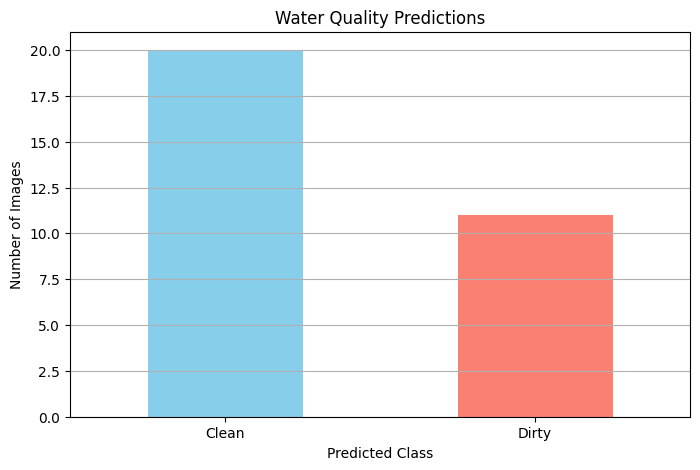

In [ ]:
# Bar Graph for Water Quality Predictions
import matplotlib.pyplot as plt

# Count occurrences of each predicted class
prediction_counts = results_df['Predicted_Class'].value_counts()

# Create bar graph
plt.figure(figsize=(8, 5))
prediction_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Water Quality Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('water_quality_predictions.png')  # Save the plot
plt.show()


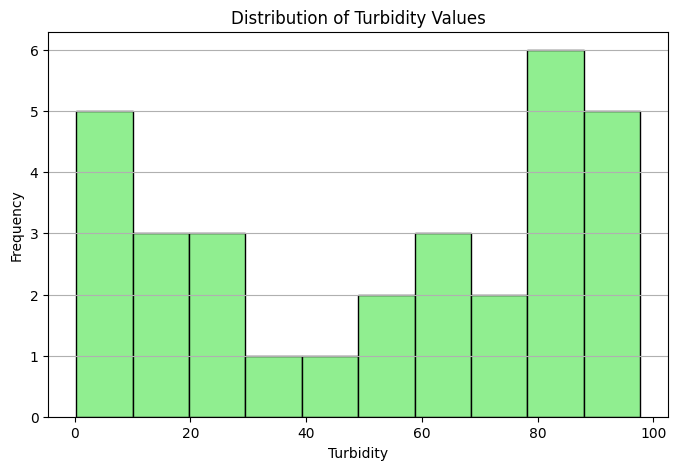

In [ ]:
# Histogram of Turbidity Values
plt.figure(figsize=(8, 5))
plt.hist(results_df['Turbidity'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Turbidity Values')
plt.xlabel('Turbidity')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.savefig('turbidity_distribution.png')  # Save the plot
plt.show()

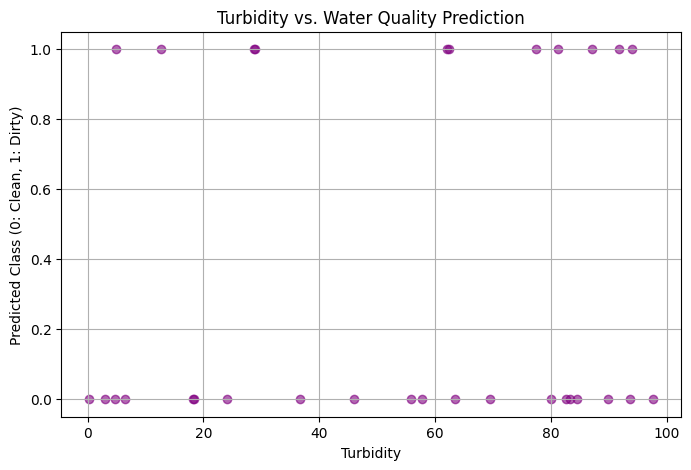

In [ ]:
#Scatter Plot of Turbidity vs. Predictions
# Map predicted classes to numerical values for plotting
results_df['Class_Numeric'] = results_df['Predicted_Class'].map({'Clean': 0, 'Dirty': 1})

plt.figure(figsize=(8, 5))
plt.scatter(results_df['Turbidity'], results_df['Class_Numeric'], alpha=0.6, color='purple')
plt.title('Turbidity vs. Water Quality Prediction')
plt.xlabel('Turbidity')
plt.ylabel('Predicted Class (0: Clean, 1: Dirty)')
plt.grid()
plt.savefig('turbidity_vs_quality.png')  # Save the plot
plt.show()

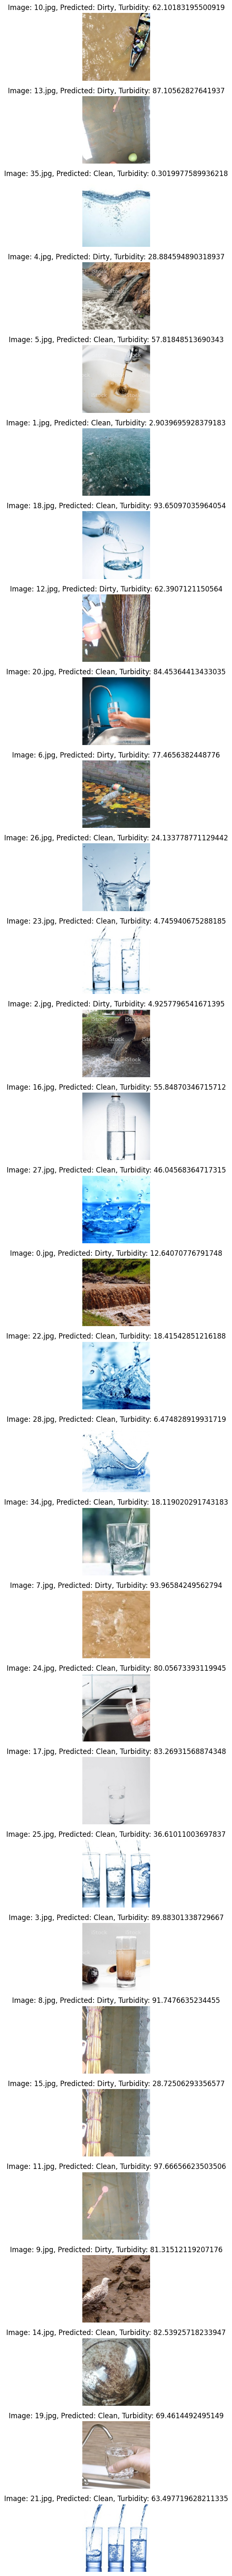

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set up the figure
fig, axes = plt.subplots(nrows=len(results_df), ncols=1, figsize=(5, len(results_df) * 2))  # Adjust figsize as needed

# Loop through each result to plot
for i, (index, row) in enumerate(results_df.iterrows()):
    img_path = os.path.join(image_directory, row['Image_Name'])
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f"Image: {row['Image_Name']}, Predicted: {row['Predicted_Class']}, Turbidity: {row['Turbidity']}")

plt.tight_layout()
plt.show()